# Description

In this notebook clasterization of customers with further analysis are performed. All process consists of folowing steps:


1. **Data Preparation**
    1. **Raw Data EDA** (Exploratory Data Analysis) - for better data understanding.
    2. **Data Cleaning** - as a result of EDA, **some features were dropped**, because of their non-informativity (for example features **Z_CostContact** and **Z_Revenue** have only one possible value, so we don't need them). Also some invalid **Marital_Status** values **were corrected or dropped** as well as **some** **Year_Birth** which looked **suspiciosly**.
    3. As a second step of Data Cleaning we need to decide what to do with **missing values**. In this case we have a few missing values in Income column, also some incorrect values in Marital_Status and Year_Birth. Proportion of corresponding customers is **1.7%**, so in this case they **just dropped** with no missing values imputing strategy.
    4. Next step is **datetime features processing**. In this case only two features relates to this type - **Year_Birth** and **Dt_Customer**. So i've decided to **replace** them with one feature - **Age**, which means Age of users on a date of customer's enrollment with the company.
    5. **Feature Engineering** - some new features that **derives from basic** was engineered. Some of them will be dropped because of high correlation with others, but they **can be used for final analysis** in this case too.
    6. **Cleaned Data EDA** - the same EDA but for cleaned data.
    7. **Categorical features encoding** - in this case **pd.get_dummies()** was used. We can't use numerical encoding because of distance-based algorithm and also it's unsupervised learning, so no new categories can appear in future, this dataset is all we have. Also we have only few caterical columns with up to 7 options for each, so the column number in dataset increased a little.
    8. **Standartization** - all data was **standart-scaled** to remove specific units for every column, so we have only distribution data and it's what we want if we use distance-based methods.
    9. **Higly correlated features removing** - it's not good if we have strongly correlated features in a dataset, because one variance would effect distance twice. So in this particular algorithm i removed all derivative correlated features, which have >= 0.75 determination coefficient with basic features. So **if variance of engineered feature > 25% independent it remains in a dataset**.
    10. **Dimentionality reduction** - if we reduce our dimentions up to 3 we do not lose too much information but will have better results. For example, KMeans gives us 5 optimal clusters in 3-d space and 12 in original space. Usually, there's no need for businees to have so much clusters. Also in 3-d space we can plot customers and visually evaluate results. So in this case PCA with 3 components was used.
<br/><br/>

2. **Clustering**

    I tried few algorithms, such as *KMeans, Hierarchical Clastering, DBSCAN and HDBSCAN* but the most suitable for this task appeared **KMeans**. To determine the optimal number of clusters **Elbow Rule** was used, so data was clasterized into **5 clusters**. 10 initial points sets was used to prevent some algorithm diverge issues.

3. **Analysis**

    After clasterization I've checked cluster sizes, mean and median values of features for each cluster and described each cluster based on these values with one paragraph. Here's these description:
  <br/>

  **Cluster 2** <br/>
      Represents the most "power customers", which are the minority of users. It's only 143 users among 2201, so it's nearly 6.5% of total number. Average customer of this cluster has the highest income among all groups - 80k, was 42 years old when came to product, has no kids or teens. They spend the most (\~1600), but more likely not to spend on gold (only 5\% of total spendings which the smallest number among clusters). Average check for users of this group is 85\$ and they have the lowest recency time (6.5 weeks when other have 7+). Also, they spend nearly 2% of income for this company products. And they accept advertisment companies the most, especially companies 1, 4 and 5. They do their purchases through catalog significantly more frequently in comparison to other customers (except cluster 0) and tend to buy without discount (only 6% purchases). And although they have not the biggest percentage of web purchases, they have very high web conversion rate (1.41 purchase per web site visit). <br/>
  
  **Cluster 0** <br/>
      Customers from this cluster are very similar to those, who are in cluster 2. They have quite lower income (74k), older by 3 years and less educated (61% have Graduation level) and spend less as well, but the proportion spend / income the same (\~2%). They tend to buy food, with also low percentage of gold and lower percentage of wine (40%, in contrast to 60% for cluster 2) through the same channels as cluster 2 customers with 2% higher number of purchases with discount. So they are slightly differ from cluster 2, but the main difference is ads campaigns acceptance. They tend to ignore campaigns (as the other clusters do, except cluster 2. Hav the same discount and web cr statistics. Although they slightly less "power" than customers from cluster 2, this cluster much more bigger (23% of total), so maybe good ads strategy will help to engage them to spend more. So the main focus may be on this cluster. <br/>
  
  **Cluster 3** <br/>
      Cluster 3 is average-sized cluster, which consists of the oldest customers (49 years, typically), most family- or ex-family-like statused (live together, married, divorced), best educated, with 1 teen at home. They have 60k income, 1% of which they spend, typically on wine (the most "wine-drinkers") with average check nearly 40$. They are also the best "web-byers" with good web cr values - 1 purchase per site visit. They also buy with discount relatively often - 20% of purchases. So, probably, they could monitor discounts on a website. These customers have similar campaigns acceptance as cluster 0 users. Because this cluster is big enough and has high income but not such a good engagement as clusters 2 and 0 (they have 2% of income spend and this cluster just 1%) it would be better to have ads campaigns targeted on these customers. Maybe some family-oreinted prodcuts should be reccommended or offered with discount. <br/>
  
  **Cluster 4** <br/>
      In contrast to previous clusters, customers from cluster 4 are the most "weak customers". This cluster is average-sized (21%) like clusters 0 and 3, and consists of (typically) 37-year old (the most youngest) customers with one child, Graduation education level and the lowest income - 28k. As a result - they have the lowest average check (only 10 dollars median value) and total spendings - nearly 50$. They spend a lot on gold (23% of spedings - the highest value among clusters, much higher than for others) and less on wine (the lowest value). They often buy their products in store and web (but they do only 1 purchase per 4 web site visits) and many of their purchases are with discount (\~27%). They spend less than 1% of income for company products. 7% of them also accept campaign 3 but less than 1% percent accepted other campaigns. So, they do few purchases (5 in median), 1 or 2 of them are with discount and they visit the web site 20 times for this. So, it looks like they tend to monitor discounts regularly to make few purchases. Maybe launching campaign to push visiting site with discount propositions help to engage higher percent of users from this cluster by production of the company and slightly increase receipts. <br/>
      
  **Cluster 1** <br/>
      Cluster 1 is the most numerous - nearly 28% of all customers. They typically are 45 years old when came in product, have one kid and one teen, have good education (>50% have Master or PhD degree). They have the lowest income except 4-th cluster - 4k and 16 dollars median average check with 90\$ median total spendings. Also, it should be noted that they spend less than 1% of income for company products, especially for products very similar to cluster 2 but with more gold proportion. Customers from this cluster tend to buy in store and in web (second the most web-buying customers after 3-rd cluster). Also, they are the biggest discount users (38% of purchases are with discount) and similar web page cr, so maybe they monitor discounts on the website. And these customers ignore ads with the same level as cluster 4 users. So this cluster are not so weak as cluster 4 but very similar to it. Because they are the most numerous group, it may be helpfull to target ads on them, maybe try to sale kids or teens specified products for them. <br/>

# Import Packages

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

np.random.seed(42)

# Data Loading

In [ ]:
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/patilkiran123/Marketing-Campaign-Analysis/main/dataset/marketing_campaign.csv',
    delimiter='\t') \
    .set_index('ID')

df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
5524         1957  Graduation         Single  58138.0        0         0   
2174         1954  Graduation         Single  46344.0        1         1   
4141         1965  Graduation       Together  71613.0        0         0   
6182         1984  Graduation       Together  26646.0        1         0   
5324         1981         PhD        Married  58293.0        1         0   
...           ...         ...            ...      ...      ...       ...   
10870        1967  Graduation        Married  61223.0        0         1   
4001         1946         PhD       Together  64014.0        2         1   
7270         1981  Graduation       Divorced  56981.0        0         0   
8235         1956      Master       Together  69245.0        0         1   
9405         1954         PhD        Married  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
5524   04-09-2012       58       635         88              546   
2174   08-03-2014       38        11          1                6   
4141   21-08-2013       26       426         49              127   
6182   10-02-2014       26        11          4               20   
5324   19-01-2014       94       173         43              118   
...           ...      ...       ...        ...              ...   
10870  13-06-2013       46       709         43              182   
4001   10-06-2014       56       406          0               30   
7270   25-01-2014       91       908         48              217   
8235   24-01-2014        8       428         30              214   
9405   15-10-2012       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
10870               42               118           247                  2   
4001                 0                 0             8                  7   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
10870                9                    3                  4   
4001                 8                    2                  5   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5524                   7             0             0             0   
2174                   5             0             0          

# Data Preparation

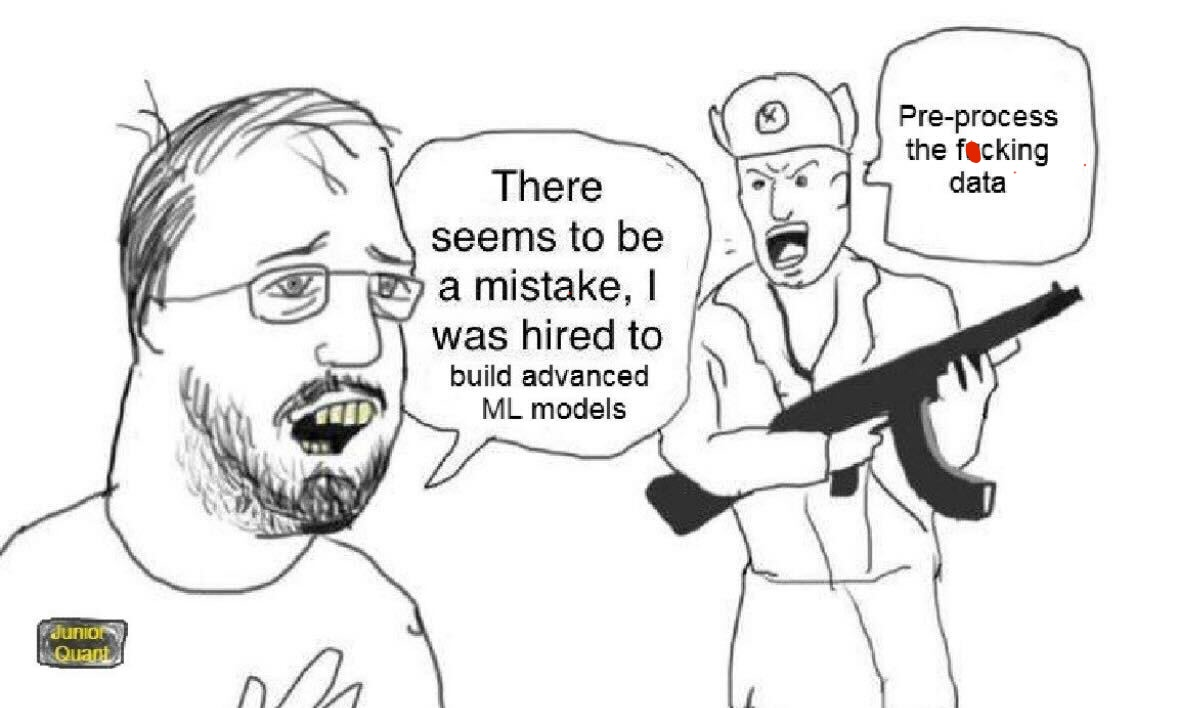

## Raw Data EDA

In [ ]:
df_exp = df.drop('Dt_Customer', axis=1)

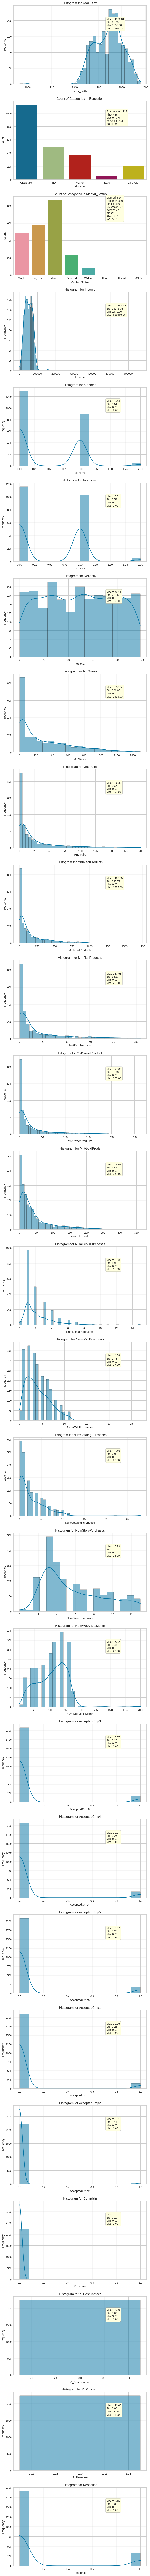

In [ ]:
fig, axes = plt.subplots(nrows=len(df_exp.columns), figsize=(8, 5 * len(df_exp.columns)))

for i, column in enumerate(df_exp.columns):
    ax = axes[i]

    # Check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df_exp[column]):
        # Create the histogram plot for numerical columns
        sns.histplot(data=df_exp, x=column, ax=ax, kde=True)

        # Add title and axis labels
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

        # Add numerical statistics as an annotation
        stats = df_exp[column].describe()
        stats_text = f"Mean: {stats['mean']:.2f}\nStd: {stats['std']:.2f}\nMin: {stats['min']:.2f}\nMax: {stats['max']:.2f}"
        ax.annotate(stats_text, xy=(0.7, 0.7), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.4", edgecolor="gray", facecolor="lightyellow"))
    else:
        # Create a bar plot for categorical columns
        sns.countplot(data=df_exp, x=column, ax=ax)

        # Add title and axis labels
        ax.set_title(f'Count of Categories in {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add value counts as an annotation
        value_counts = df_exp[column].value_counts()
        value_counts_text = '\n'.join([f"{index}: {count}" for index, count in value_counts.items()])
        ax.annotate(value_counts_text, xy=(0.7, 0.7), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.4", edgecolor="gray", facecolor="lightyellow"))

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Count'>

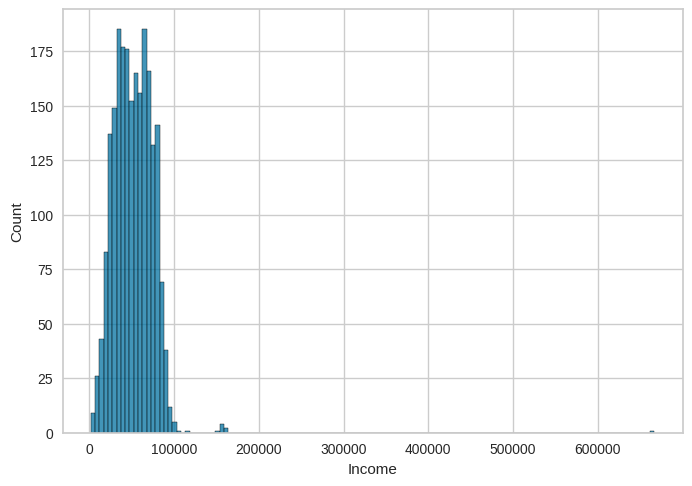

In [ ]:
sns.histplot(df.Income)

<Axes: xlabel='Income', ylabel='Count'>

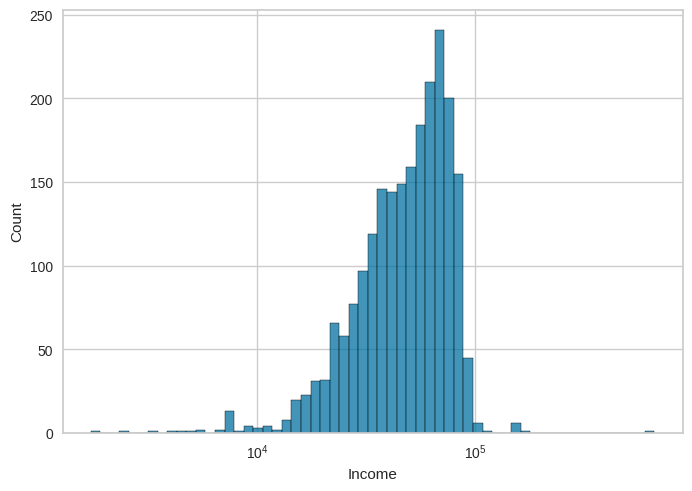

In [ ]:
sns.histplot(df.Income, log_scale=True)

In [ ]:
df.Z_CostContact.unique()

array([3])

In [ ]:
df.Z_Revenue.unique()

array([11])

## Data Cleaning

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df.loc[df.Marital_Status == 'Alone', 'Marital_Status'] = 'Single'
df.loc[df.Marital_Status.isin(['Absurd', 'YOLO']), 'Marital_Status'] = np.nan

df.Marital_Status.value_counts(dropna=False)

Married     864
Together    580
Single      483
Divorced    232
Widow        77
NaN           4
Name: Marital_Status, dtype: int64

In [ ]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
df.Year_Birth.quantile(0.005)

1943.195

In [ ]:
df.loc[df.Year_Birth < df.Year_Birth.quantile(0.005), 'Year_Birth'] = np.nan
df.Year_Birth.describe()

count    2228.000000
mean     1969.008528
std        11.603594
min      1944.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
5524       1957.0  Graduation         Single  58138.0        0         0   
2174       1954.0  Graduation         Single  46344.0        1         1   
4141       1965.0  Graduation       Together  71613.0        0         0   
6182       1984.0  Graduation       Together  26646.0        1         0   
5324       1981.0         PhD        Married  58293.0        1         0   
...           ...         ...            ...      ...      ...       ...   
10870      1967.0  Graduation        Married  61223.0        0         1   
4001       1946.0         PhD       Together  64014.0        2         1   
7270       1981.0  Graduation       Divorced  56981.0        0         0   
8235       1956.0      Master       Together  69245.0        0         1   
9405       1954.0         PhD        Married  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
5524   04-09-2012       58       635         88              546   
2174   08-03-2014       38        11          1                6   
4141   21-08-2013       26       426         49              127   
6182   10-02-2014       26        11          4               20   
5324   19-01-2014       94       173         43              118   
...           ...      ...       ...        ...              ...   
10870  13-06-2013       46       709         43              182   
4001   10-06-2014       56       406          0               30   
7270   25-01-2014       91       908         48              217   
8235   24-01-2014        8       428         30              214   
9405   15-10-2012       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
10870               42               118           247                  2   
4001                 0                 0             8                  7   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
10870                9                    3                  4   
4001                 8                    2                  5   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5524                   7             0             0             0   
2174                   5             0             0          

## NaN Processing

In [ ]:
df.isna().sum()

Year_Birth             12
Education               0
Marital_Status          4
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
# dataframe loss if dropna
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

0.017410714285714286

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

## Datetime Features Processing

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer']

ID
5524    2012-09-04
2174    2014-03-08
4141    2013-08-21
6182    2014-02-10
5324    2014-01-19
           ...    
10870   2013-06-13
4001    2014-06-10
7270    2014-01-25
8235    2014-01-24
9405    2012-10-15
Name: Dt_Customer, Length: 2201, dtype: datetime64[ns]

In [ ]:
df.Dt_Customer.describe()

<ipython-input-35-96867385e6bf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Dt_Customer.describe()


count                    2201
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [ ]:
df.Year_Birth = pd.to_datetime(df.Year_Birth, format='%Y')
df.Year_Birth.describe()

<ipython-input-36-2d8fb60adbb2>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Year_Birth.describe()


count                    2201
unique                     53
top       1976-01-01 00:00:00
freq                       89
first     1944-01-01 00:00:00
last      1996-01-01 00:00:00
Name: Year_Birth, dtype: object

In [ ]:
df['Age'] = (df.Dt_Customer.dt.year - df.Year_Birth.dt.year)
df.Age.describe()

count    2201.000000
mean       44.024080
std        11.641496
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        70.000000
Name: Age, dtype: float64

In [ ]:
df.drop(['Dt_Customer', 'Year_Birth'], axis=1, inplace=True)
df.nunique()

Education                 5
Marital_Status            5
Income                 1963
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                772
MntFruits               158
MntMeatProducts         550
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            211
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Age                      55
dtype: int64

In [ ]:
original_features = df.columns.copy().to_list()
original_features

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age']

## Feature Engineering

In [ ]:
df['Kidhome_and_Teenhome'] = df.Kidhome + df.Teenhome
df['Kidhome_proportion'] = (df.Kidhome / df['Kidhome_and_Teenhome']).fillna(0)
df['Teenhome_proportion'] = (df.Teenhome / df['Kidhome_and_Teenhome']).fillna(0)
df

df[['Kidhome_and_Teenhome', 'Kidhome_proportion', 'Teenhome_proportion']].describe()

Kidhome_and_Teenhome  Kidhome_proportion  Teenhome_proportion
count           2201.000000         2201.000000          2201.000000
mean               0.951840            0.328866             0.388536
std                0.748603            0.416930             0.436694
min                0.000000            0.000000             0.000000
25%                0.000000            0.000000             0.000000
50%                1.000000            0.000000             0.000000
75%                1.000000            0.500000             1.000000
max                3.000000            1.000000             1.000000

In [ ]:
df['Income_Age_proportion'] = df.Income / df.Age
df.Income_Age_proportion.describe()

count     2201.000000
mean      1255.482281
std        750.273608
min         40.232558
25%        823.809524
50%       1124.243902
75%       1500.566038
max      18518.500000
Name: Income_Age_proportion, dtype: float64

In [ ]:
purchases_products_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
purchases_with_gold_columns = purchases_products_columns + ['MntGoldProds']
purchases_with_gold_columns

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [ ]:
df['Spend_total'] = 0
for column in purchases_with_gold_columns:
    df['Spend_total'] += df[column]

df.Spend_total.describe()

count    2201.000000
mean      604.765561
std       602.096925
min         5.000000
25%        68.000000
50%       395.000000
75%      1044.000000
max      2525.000000
Name: Spend_total, dtype: float64

In [ ]:
df['Spend_without_gold'] = 0
for column in purchases_products_columns:
    df['Spend_without_gold'] += df[column]

df.Spend_without_gold.describe()

count    2201.000000
mean      560.926397
std       576.428342
min         4.000000
25%        55.000000
50%       341.000000
75%       962.000000
max      2491.000000
Name: Spend_without_gold, dtype: float64

In [ ]:
df['Spend_without_gold_proportion'] = df.Spend_without_gold / df.Spend_total
df['Spend_without_gold_proportion'].describe()

count    2201.000000
mean        0.879624
std         0.108946
min         0.105850
25%         0.829365
50%         0.913832
75%         0.961905
max         1.000000
Name: Spend_without_gold_proportion, dtype: float64

In [ ]:
df['Spend_gold_proportion'] = df.MntGoldProds / df.Spend_total
df['Spend_gold_proportion'].describe()

count    2201.000000
mean        0.120376
std         0.108946
min         0.000000
25%         0.038095
50%         0.086168
75%         0.170635
max         0.894150
Name: Spend_gold_proportion, dtype: float64

In [ ]:
for column in purchases_products_columns:
    df[column + '_proportion'] = df[column] / df.Spend_without_gold

df[[item + '_proportion' for item in purchases_products_columns]].describe()

MntWines_proportion  MntFruits_proportion  MntMeatProducts_proportion  \
count          2201.000000           2201.000000                 2201.000000   
mean              0.509832              0.059733                    0.283666   
std               0.238528              0.073080                    0.135907   
min               0.000000              0.000000                    0.000000   
25%               0.334084              0.009449                    0.180000   
50%               0.516854              0.035714                    0.272727   
75%               0.701740              0.079375                    0.375000   
max               0.972222              0.762712                    0.997687   

       MntFishProducts_proportion  MntSweetProducts_proportion  
count                 2201.000000                  2201.000000  
mean                     0.085582                     0.061187  
std                      0.100502                     0.078033  
min                      0.000000                     0.000000  
25%                      0.013289                     0.009302  
50%                      0.051858                     0.038043  
75%                      0.121212                     0.082910  
max                      0.750000                     0.956204

In [ ]:
df['Spend_total_Income_proportion'] = df.Spend_total / df.Income
df.Spend_total_Income_proportion.describe()

count    2201.000000
mean        0.009884
std         0.016859
min         0.000039
25%         0.002341
50%         0.007928
75%         0.015435
max         0.706988
Name: Spend_total_Income_proportion, dtype: float64

In [ ]:
campaign_columns = df.columns[pd.Series(df.columns).str.contains('Cmp')].to_list()
campaign_columns

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']

In [ ]:
df['Campaigns_Accepted'] = 0
for column in campaign_columns:
    df['Campaigns_Accepted'] += df[column]

df.Campaigns_Accepted.describe()

count    2201.000000
mean        0.297138
std         0.679462
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Campaigns_Accepted, dtype: float64

In [ ]:
df

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
ID                                                                      
5524   Graduation         Single  58138.0        0         0       58   
2174   Graduation         Single  46344.0        1         1       38   
4141   Graduation       Together  71613.0        0         0       26   
6182   Graduation       Together  26646.0        1         0       26   
5324          PhD        Married  58293.0        1         0       94   
...           ...            ...      ...      ...       ...      ...   
10870  Graduation        Married  61223.0        0         1       46   
4001          PhD       Together  64014.0        2         1       56   
7270   Graduation       Divorced  56981.0        0         0       91   
8235       Master       Together  69245.0        0         1        8   
9405          PhD        Married  52869.0        1         1       40   

       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
ID                                                             
5524        635         88              546              172   
2174         11          1                6                2   
4141        426         49              127              111   
6182         11          4               20               10   
5324        173         43              118               46   
...         ...        ...              ...              ...   
10870       709         43              182               42   
4001        406          0               30                0   
7270        908         48              217               32   
8235        428         30              214               80   
9405         84          3               61                2   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
ID                                                                          
5524                 88            88                  3                8   
2174                  1             6                  2                1   
4141                 21            42                  1                8   
6182                  3             5                  2                2   
5324                 27            15                  5                5   
...                 ...           ...                ...              ...   
10870               118           247                  2                9   
4001                  0             8                  7                8   
7270                 12            24                  1                2   
8235                 30            61                  2                6   
9405                  1            21                  3                3   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
ID                                                                 
5524                    10                  4                  7   
2174                     1                  2                  5   
4141                     2                 10                  4   
6182                     0                  4                  6   
5324                     3                  6                  5   
...                    ...                ...                ...   
10870                    3                  4                  5   
4001                     2                  5                  7   
7270                     3                 13                  6   
8235                     5                 10                  3   
9405                     1                  4                  7   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                            
5524              0             0             0             0             0   
2174              0             0             0             0             0   
4141              0   

In [ ]:
# 'NumDealsPurchases'
purchases_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df['Purchases_total'] = 0
for column in purchases_columns:
    df['Purchases_total'] += df[column]

df.Purchases_total.describe()

count    2201.000000
mean       12.533848
std         7.202138
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Purchases_total, dtype: float64

In [ ]:
for column in purchases_columns:
    df[column + '_proportion'] = (df[column] / df.Purchases_total).fillna(0)

df[[item + '_proportion' for item in purchases_columns]].describe()

NumWebPurchases_proportion  NumCatalogPurchases_proportion  \
count                 2201.000000                     2201.000000   
mean                     0.328897                        0.164131   
std                      0.122181                        0.140289   
min                      0.000000                        0.000000   
25%                      0.250000                        0.000000   
50%                      0.333333                        0.150000   
75%                      0.400000                        0.250000   
max                      1.000000                        1.000000   

       NumStorePurchases_proportion  
count                   2201.000000  
mean                       0.504246  
std                        0.151052  
min                        0.000000  
25%                        0.400000  
50%                        0.500000  
75%                        0.600000  
max                        1.000000

In [ ]:
df['with_discount_proportion'] = df.NumDealsPurchases / (df.Purchases_total + 1)
df.with_discount_proportion.describe()

count    2201.000000
mean        0.227580
std         0.494726
min         0.000000
25%         0.076923
50%         0.181818
75%         0.312500
max        15.000000
Name: with_discount_proportion, dtype: float64

In [ ]:
df['avg_check'] = df.Spend_total / (df.Purchases_total + 1e-3)
df.avg_check.describe()

count    2201.000000
mean       56.424220
std       371.761470
min         2.665778
25%        12.997401
50%        29.843858
75%        49.519586
max      9000.000000
Name: avg_check, dtype: float64

In [ ]:
df['web_cr_to_paid'] = df.NumWebPurchases / (df.NumWebVisitsMonth + 1)
df['web_cr_to_paid'].describe()

count    2201.000000
mean        0.796313
std         0.833715
min         0.000000
25%         0.285714
50%         0.666667
75%         1.222222
max        23.000000
Name: web_cr_to_paid, dtype: float64

In [ ]:
df

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
ID                                                                      
5524   Graduation         Single  58138.0        0         0       58   
2174   Graduation         Single  46344.0        1         1       38   
4141   Graduation       Together  71613.0        0         0       26   
6182   Graduation       Together  26646.0        1         0       26   
5324          PhD        Married  58293.0        1         0       94   
...           ...            ...      ...      ...       ...      ...   
10870  Graduation        Married  61223.0        0         1       46   
4001          PhD       Together  64014.0        2         1       56   
7270   Graduation       Divorced  56981.0        0         0       91   
8235       Master       Together  69245.0        0         1        8   
9405          PhD        Married  52869.0        1         1       40   

       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
ID                                                             
5524        635         88              546              172   
2174         11          1                6                2   
4141        426         49              127              111   
6182         11          4               20               10   
5324        173         43              118               46   
...         ...        ...              ...              ...   
10870       709         43              182               42   
4001        406          0               30                0   
7270        908         48              217               32   
8235        428         30              214               80   
9405         84          3               61                2   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
ID                                                                          
5524                 88            88                  3                8   
2174                  1             6                  2                1   
4141                 21            42                  1                8   
6182                  3             5                  2                2   
5324                 27            15                  5                5   
...                 ...           ...                ...              ...   
10870               118           247                  2                9   
4001                  0             8                  7                8   
7270                 12            24                  1                2   
8235                 30            61                  2                6   
9405                  1            21                  3                3   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
ID                                                                 
5524                    10                  4                  7   
2174                     1                  2                  5   
4141                     2                 10                  4   
6182                     0                  4                  6   
5324                     3                  6                  5   
...                    ...                ...                ...   
10870                    3                  4                  5   
4001                     2                  5                  7   
7270                     3                 13                  6   
8235                     5                 10                  3   
9405                     1                  4                  7   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                            
5524              0             0             0             0             0   
2174              0             0             0             0             0   
4141              0   

## Cleaned Data EDA

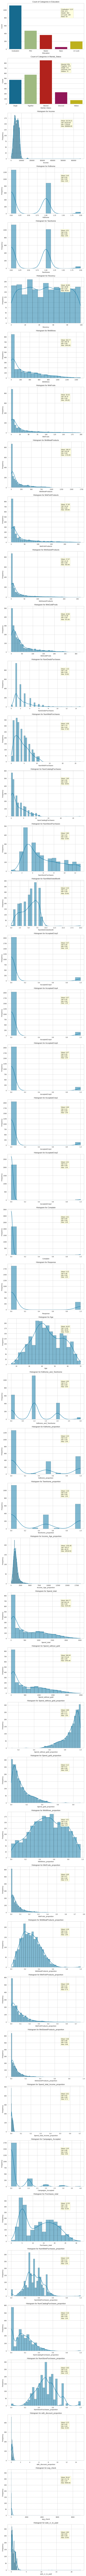

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(8, 5 * len(df.columns)))

for i, column in enumerate(df.columns):
    ax = axes[i]

    # Check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df[column]):
        # Create the histogram plot for numerical columns
        sns.histplot(data=df, x=column, ax=ax, kde=True)

        # Add title and axis labels
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

        # Add numerical statistics as an annotation
        stats = df[column].describe()
        stats_text = f"Mean: {stats['mean']:.2f}\nStd: {stats['std']:.2f}\nMin: {stats['min']:.2f}\nMax: {stats['max']:.2f}"
        ax.annotate(stats_text, xy=(0.7, 0.7), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.4", edgecolor="gray", facecolor="lightyellow"))
    else:
        # Create a bar plot for categorical columns
        sns.countplot(data=df, x=column, ax=ax)

        # Add title and axis labels
        ax.set_title(f'Count of Categories in {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add value counts as an annotation
        value_counts = df[column].value_counts()
        value_counts_text = '\n'.join([f"{index}: {count}" for index, count in value_counts.items()])
        ax.annotate(value_counts_text, xy=(0.7, 0.7), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.4", edgecolor="gray", facecolor="lightyellow"))

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df.isna().sum()

Education                         0
Marital_Status                    0
Income                            0
Kidhome                           0
Teenhome                          0
Recency                           0
MntWines                          0
MntFruits                         0
MntMeatProducts                   0
MntFishProducts                   0
MntSweetProducts                  0
MntGoldProds                      0
NumDealsPurchases                 0
NumWebPurchases                   0
NumCatalogPurchases               0
NumStorePurchases                 0
NumWebVisitsMonth                 0
AcceptedCmp3                      0
AcceptedCmp4                      0
AcceptedCmp5                      0
AcceptedCmp1                      0
AcceptedCmp2                      0
Complain                          0
Response                          0
Age                               0
Kidhome_and_Teenhome              0
Kidhome_proportion                0
Teenhome_proportion         

## Categorical Features Encoding

In [ ]:
df = pd.get_dummies(df)
df

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID                                                                
5524   58138.0        0         0       58       635         88   
2174   46344.0        1         1       38        11          1   
4141   71613.0        0         0       26       426         49   
6182   26646.0        1         0       26        11          4   
5324   58293.0        1         0       94       173         43   
...        ...      ...       ...      ...       ...        ...   
10870  61223.0        0         1       46       709         43   
4001   64014.0        2         1       56       406          0   
7270   56981.0        0         0       91       908         48   
8235   69245.0        0         1        8       428         30   
9405   52869.0        1         1       40        84          3   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
ID                                                                        
5524               546              172                88            88   
2174                 6                2                 1             6   
4141               127              111                21            42   
6182                20               10                 3             5   
5324               118               46                27            15   
...                ...              ...               ...           ...   
10870              182               42               118           247   
4001                30                0                 0             8   
7270               217               32                12            24   
8235               214               80                30            61   
9405                61                2                 1            21   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
ID                                                               
5524                   3                8                   10   
2174                   2                1                    1   
4141                   1                8                    2   
6182                   2                2                    0   
5324                   5                5                    3   
...                  ...              ...                  ...   
10870                  2                9                    3   
4001                   7                8                    2   
7270                   1                2                    3   
8235                   2                6                    5   
9405                   3                3                    1   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
5524                   4                  7             0             0   
2174                   2                  5             0             0   
4141                  10                  4             0             0   
6182                   4                  6             0             0   
5324                   6                  5             0             0   
...                  ...                ...           ...           ...   
10870                  4                  5             0             0   
4001                   5                  7             0             0   
7270                  13                  6             0             1   
8235                  10                  3             0             0   
9405                   4                  7             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
ID                                                                         
5524              0             0             0         0         1   55   
2174              0             0             0         0         0   60   
4141              0  

## Standartization

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X = scaler.fit_transform(df)
X

array([[ 0.23652989, -0.82697859, -0.93234639, ...,  1.91651666,
        -0.59256701, -0.1878231 ],
       [-0.2313892 ,  1.03414603,  0.90480169, ...,  1.91651666,
        -0.59256701, -0.1878231 ],
       [ 0.77114153, -0.82697859, -0.93234639, ..., -0.52177997,
         1.68757284, -0.1878231 ],
       ...,
       [ 0.19062668, -0.82697859, -0.93234639, ..., -0.52177997,
        -0.59256701, -0.1878231 ],
       [ 0.67719271, -0.82697859,  0.90480169, ..., -0.52177997,
         1.68757284, -0.1878231 ],
       [ 0.02748582,  1.03414603,  0.90480169, ..., -0.52177997,
        -0.59256701, -0.1878231 ]])

In [ ]:
X = pd.DataFrame(X)
X.columns = df.columns
X

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.236530 -0.826979 -0.932346  0.311455  0.983775   1.550828   
1    -0.231389  1.034146  0.904802 -0.379412 -0.869570  -0.636651   
2     0.771142 -0.826979 -0.932346 -0.793932  0.363023   0.570234   
3    -1.012894  1.034146 -0.932346 -0.793932 -0.869570  -0.561221   
4     0.242679  1.034146 -0.932346  1.555016 -0.388413   0.419373   
...        ...       ...       ...       ...       ...        ...   
2196  0.358925 -0.826979  0.904802 -0.103065  1.203563   0.419373   
2197  0.469656  2.895271  0.904802  0.242368  0.303621  -0.661795   
2198  0.190627 -0.826979 -0.932346  1.451386  1.794614   0.545091   
2199  0.677193 -0.826979  0.904802 -1.415712  0.368964   0.092509   
2200  0.027486  1.034146  0.904802 -0.310325 -0.652752  -0.586364   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            1.693478         2.475030          1.481047      0.856353   
1           -0.716011        -0.648507         -0.633628     -0.733765   
2           -0.176107         1.354231         -0.147496     -0.035664   
3           -0.653542        -0.501517         -0.585015     -0.753156   
4           -0.216265         0.159938         -0.001657     -0.559240   
...               ...              ...               ...           ...   
2196         0.069304         0.086443          2.210245      3.939629   
2197        -0.608922        -0.685255         -0.657935     -0.694981   
2198         0.225475        -0.097295         -0.366256     -0.384715   
2199         0.212089         0.784645          0.071263      0.332777   
2200        -0.470600        -0.648507         -0.633628     -0.442890   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              0.349409         1.430165             2.518401   
1             -0.169868        -1.122790            -0.568284   
2             -0.689145         1.430165            -0.225319   
3             -0.169868        -0.758082            -0.911249   
4              1.387963         0.336042             0.117646   
...                 ...              ...                  ...   
2196          -0.169868         1.794873             0.117646   
2197           2.426518         1.430165            -0.225319   
2198          -0.689145        -0.758082             0.117646   
2199          -0.169868         0.700749             0.803576   
2200           0.349409        -0.393374            -0.568284   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.553334           0.690167      -0.28093     -0.283744   
1             -1.168740          -0.135408      -0.28093     -0.283744   
2              1.292884          -0.548195      -0.28093     -0.283744   
3             -0.553334           0.277380      -0.28093     -0.283744   
4              0.062072          -0.135408      -0.28093     -0.283744   
...                 ...                ...           ...           ...   
2196          -0.553334          -0.135408      -0.28093     -0.283744   
2197          -0.245631           0.690167      -0.28093     -0.283744   
2198           2.215993           0.277380      -0.28093      3.524306   
2199           1.292884          -0.960983      -0.28093     -0.283744   
2200          -0.553334           0.690167      -0.28093     -0.283744   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response       Age  \
0        -0.278096     -0.261623     -0.117552 -0.093315  2.385366  0.943042   
1        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223  1.372637   
2        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223  0.341608   
3        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223 -1.204937   
4        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223 -0.947179   
...            ...           ...           ...       ...       ...       ...   
2196     -0.278096     -0.261623     -0.117552 -0.093315 -0.

## Higly correlated features removing

<Axes: >

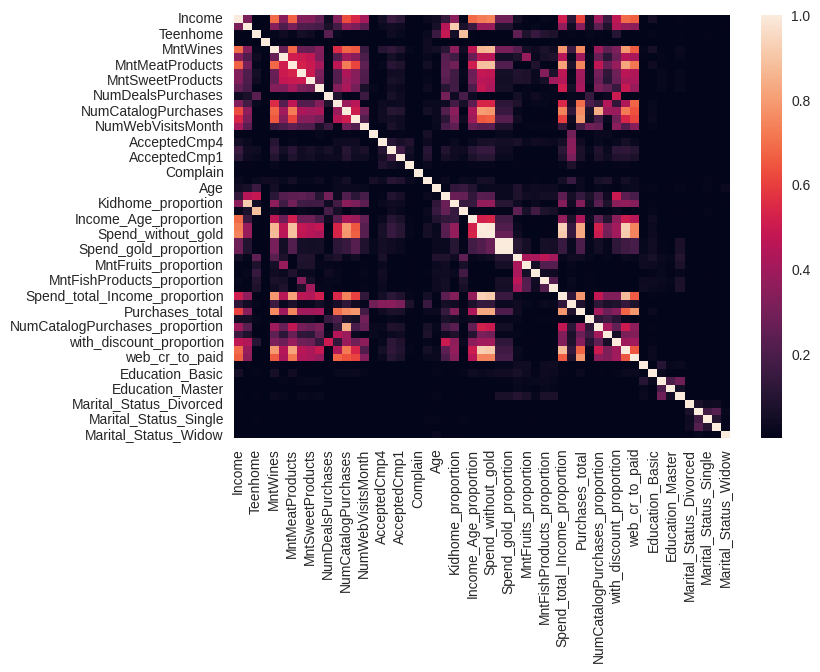

In [ ]:
determination_matrix = X.corr(method='spearman')**2
sns.heatmap(determination_matrix)

In [ ]:
for feature in determination_matrix:
    feature_correlations = determination_matrix[feature].drop(feature)
    higly_correlated_features = feature_correlations[feature_correlations >= 0.75].index
    if higly_correlated_features.shape[0] != 0:
        print(feature)
        for covariate in higly_correlated_features:
            print(covariate, determination_matrix.loc[feature, covariate])

Kidhome
Kidhome_proportion 0.9149864911537842
Teenhome
Teenhome_proportion 0.8866624969840415
MntWines
Spend_total 0.8618914638723854
Spend_without_gold 0.8771923256455675
Spend_total_Income_proportion 0.7885098181047848
Purchases_total 0.7557373024394056
avg_check 0.7913682243391432
MntMeatProducts
Spend_total 0.8842968645771971
Spend_without_gold 0.8891079770783148
Spend_total_Income_proportion 0.8118586082093934
avg_check 0.8180113644675416
NumCatalogPurchases
Spend_total 0.7994766767346965
Spend_without_gold 0.7862575038864488
Purchases_total 0.7606598267910729
NumCatalogPurchases_proportion 0.836434884802402
NumStorePurchases
Purchases_total 0.7883102240008953
Kidhome_proportion
Kidhome 0.9149864911537842
Teenhome_proportion
Teenhome 0.8866624969840415
Spend_total
MntWines 0.8618914638723854
MntMeatProducts 0.8842968645771971
NumCatalogPurchases 0.7994766767346965
Spend_without_gold 0.9929399075009152
Spend_total_Income_proportion 0.9334669596595219
Purchases_total 0.8295682629365

In [ ]:
features_to_drop = ['Kidhome_proportion', 'Teenhome_proportion', 'Spend_total', 'Spend_without_gold', 'Purchases_total',
                    'Spend_total_Income_proportion', 'avg_check', 'NumCatalogPurchases_proportion', 'Spend_gold_proportion',
                    'NumCatalogPurchases_proportion',]

In [ ]:
X.drop(features_to_drop, axis=1, inplace=True, errors='ignore')
X

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.236530 -0.826979 -0.932346  0.311455  0.983775   1.550828   
1    -0.231389  1.034146  0.904802 -0.379412 -0.869570  -0.636651   
2     0.771142 -0.826979 -0.932346 -0.793932  0.363023   0.570234   
3    -1.012894  1.034146 -0.932346 -0.793932 -0.869570  -0.561221   
4     0.242679  1.034146 -0.932346  1.555016 -0.388413   0.419373   
...        ...       ...       ...       ...       ...        ...   
2196  0.358925 -0.826979  0.904802 -0.103065  1.203563   0.419373   
2197  0.469656  2.895271  0.904802  0.242368  0.303621  -0.661795   
2198  0.190627 -0.826979 -0.932346  1.451386  1.794614   0.545091   
2199  0.677193 -0.826979  0.904802 -1.415712  0.368964   0.092509   
2200  0.027486  1.034146  0.904802 -0.310325 -0.652752  -0.586364   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            1.693478         2.475030          1.481047      0.856353   
1           -0.716011        -0.648507         -0.633628     -0.733765   
2           -0.176107         1.354231         -0.147496     -0.035664   
3           -0.653542        -0.501517         -0.585015     -0.753156   
4           -0.216265         0.159938         -0.001657     -0.559240   
...               ...              ...               ...           ...   
2196         0.069304         0.086443          2.210245      3.939629   
2197        -0.608922        -0.685255         -0.657935     -0.694981   
2198         0.225475        -0.097295         -0.366256     -0.384715   
2199         0.212089         0.784645          0.071263      0.332777   
2200        -0.470600        -0.648507         -0.633628     -0.442890   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              0.349409         1.430165             2.518401   
1             -0.169868        -1.122790            -0.568284   
2             -0.689145         1.430165            -0.225319   
3             -0.169868        -0.758082            -0.911249   
4              1.387963         0.336042             0.117646   
...                 ...              ...                  ...   
2196          -0.169868         1.794873             0.117646   
2197           2.426518         1.430165            -0.225319   
2198          -0.689145        -0.758082             0.117646   
2199          -0.169868         0.700749             0.803576   
2200           0.349409        -0.393374            -0.568284   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.553334           0.690167      -0.28093     -0.283744   
1             -1.168740          -0.135408      -0.28093     -0.283744   
2              1.292884          -0.548195      -0.28093     -0.283744   
3             -0.553334           0.277380      -0.28093     -0.283744   
4              0.062072          -0.135408      -0.28093     -0.283744   
...                 ...                ...           ...           ...   
2196          -0.553334          -0.135408      -0.28093     -0.283744   
2197          -0.245631           0.690167      -0.28093     -0.283744   
2198           2.215993           0.277380      -0.28093      3.524306   
2199           1.292884          -0.960983      -0.28093     -0.283744   
2200          -0.553334           0.690167      -0.28093     -0.283744   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response       Age  \
0        -0.278096     -0.261623     -0.117552 -0.093315  2.385366  0.943042   
1        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223  1.372637   
2        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223  0.341608   
3        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223 -1.204937   
4        -0.278096     -0.261623     -0.117552 -0.093315 -0.419223 -0.947179   
...            ...           ...           ...       ...       ...       ...   
2196     -0.278096     -0.261623     -0.117552 -0.093315 -0.

<Axes: >

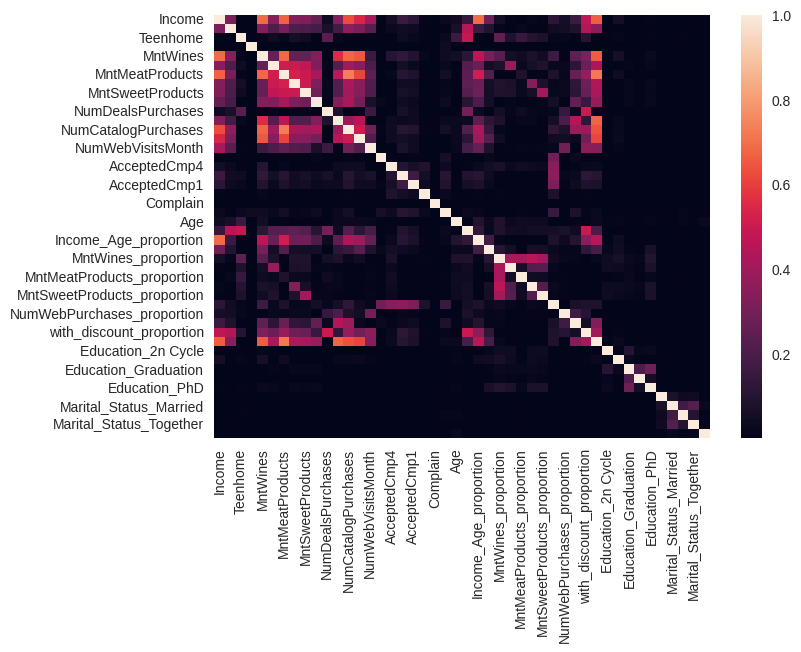

In [ ]:
determination_matrix = X.corr(method='spearman')**2
sns.heatmap(determination_matrix)

In [ ]:
for feature in determination_matrix:
    feature_correlations = determination_matrix[feature].drop(feature)
    higly_correlated_features = feature_correlations[feature_correlations >= 0.8].index
    if higly_correlated_features.shape[0] != 0:
        print(feature)
        for covariate in higly_correlated_features:
            print(covariate, determination_matrix.loc[feature, covariate])

## Dimentionality reduction

In [ ]:
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [ ]:
x_pca = pca.fit_transform(X)
x_pca

array([[ 3.82934078, -1.34465753, -0.9658831 ],
       [-2.81133573,  0.30154133, -0.05548903],
       [ 1.92930104, -0.38133393, -1.4961074 ],
       ...,
       [ 1.99567082,  0.65154855,  1.27255612],
       [ 1.73003035,  0.90104575, -1.86446934],
       [-1.88333096,  2.03747616,  0.45096882]])

In [ ]:
df_pca = pd.DataFrame({'PC1': x_pca[:, 0], 'PC2': x_pca[:, 1], 'PC3': x_pca[:, 2]})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', opacity=0.7, size_max=10)

# Customize the layout
fig.update_layout(
    title="3D Scatter Plot",
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Show the plot
fig.show()

# Clustering

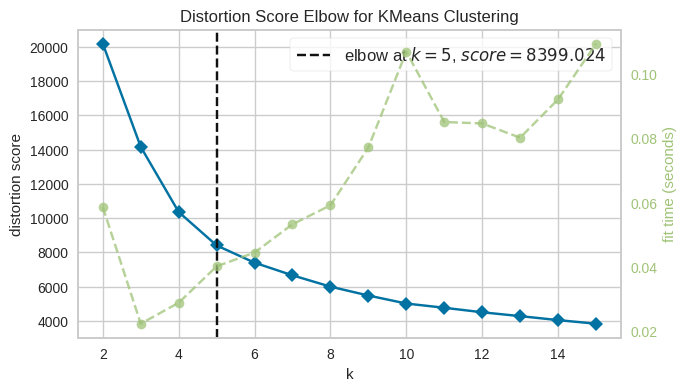

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=15, ax=ax)
Elbow_M.fit(x_pca)
Elbow_M.show()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=Elbow_M.elbow_value_, n_init=10)
kmeans.fit(x_pca)
clusters = kmeans.predict(x_pca)
clusters

array([0, 1, 0, ..., 3, 3, 1], dtype=int32)

In [ ]:
df_pca = pd.DataFrame({'PC1': x_pca[:, 0], 'PC2': x_pca[:, 1], 'PC3': x_pca[:, 2], 'Cluster': clusters})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.7, size_max=10)

# Customize the layout
fig.update_layout(
    title="3D Scatter Plot with Clusters",
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Show the plot
fig.show()

# Analysis

In [ ]:
df['cluster'] = clusters
df

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID                                                                
5524   58138.0        0         0       58       635         88   
2174   46344.0        1         1       38        11          1   
4141   71613.0        0         0       26       426         49   
6182   26646.0        1         0       26        11          4   
5324   58293.0        1         0       94       173         43   
...        ...      ...       ...      ...       ...        ...   
10870  61223.0        0         1       46       709         43   
4001   64014.0        2         1       56       406          0   
7270   56981.0        0         0       91       908         48   
8235   69245.0        0         1        8       428         30   
9405   52869.0        1         1       40        84          3   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
ID                                                                        
5524               546              172                88            88   
2174                 6                2                 1             6   
4141               127              111                21            42   
6182                20               10                 3             5   
5324               118               46                27            15   
...                ...              ...               ...           ...   
10870              182               42               118           247   
4001                30                0                 0             8   
7270               217               32                12            24   
8235               214               80                30            61   
9405                61                2                 1            21   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
ID                                                               
5524                   3                8                   10   
2174                   2                1                    1   
4141                   1                8                    2   
6182                   2                2                    0   
5324                   5                5                    3   
...                  ...              ...                  ...   
10870                  2                9                    3   
4001                   7                8                    2   
7270                   1                2                    3   
8235                   2                6                    5   
9405                   3                3                    1   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
5524                   4                  7             0             0   
2174                   2                  5             0             0   
4141                  10                  4             0             0   
6182                   4                  6             0             0   
5324                   6                  5             0             0   
...                  ...                ...           ...           ...   
10870                  4                  5             0             0   
4001                   5                  7             0             0   
7270                  13                  6             0             1   
8235                  10                  3             0             0   
9405                   4                  7             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
ID                                                                         
5524              0             0             0         0         1   55   
2174              0             0             0         0         0   60   
4141              0  

## cluster sizes

In [ ]:
df.groupby('cluster').count().T.iloc[0, :]

cluster
0    503
1    610
2    143
3    479
4    466
Name: Income, dtype: int64

In [ ]:
df.groupby('cluster').count().T.iloc[0, :].sum()

2201

In [ ]:
df.groupby('cluster').count().T.iloc[0, :] / df.groupby('cluster').count().T.iloc[0, :].sum()

cluster
0    0.228532
1    0.277147
2    0.064970
3    0.217628
4    0.211722
Name: Income, dtype: float64

So we have 5 clusters

The largest - cluster 1 (\~600 customers)<br/>
The smallest - cluster 2 (\~150 customers)<br/>
And 3 equisized clusters - 0, 3 and 4 with (\~450-500 customers)

## mean values

In [ ]:
df.groupby('cluster').mean().T.round(2)

cluster                                0         1         2         3  \
Income                          73659.77  40347.47  80206.76  60184.29   
Kidhome                             0.05      0.83      0.06      0.18   
Teenhome                            0.25      0.74      0.17      0.95   
Recency                            49.81     49.08     46.29     48.65   
MntWines                          470.36     73.27    911.71    521.81   
MntFruits                          70.73      3.98     48.92     19.24   
MntMeatProducts                   417.55     32.72    435.03    135.00   
MntFishProducts                    98.64      6.02     73.66     26.13   
MntSweetProducts                   71.63      4.03     58.25     18.82   
MntGoldProds                       78.07     16.95     74.79     56.24   
NumDealsPurchases                   1.55      2.72      1.22      3.58   
NumWebPurchases                     5.19      2.63      5.62      6.44   
NumCatalogPurchases                 5.52      0.69      5.99      3.29   
NumStorePurchases                   8.40      3.59      8.13      7.85   
NumWebVisitsMonth                   2.92      6.46      3.59      5.66   
AcceptedCmp3                        0.04      0.07      0.20      0.07   
AcceptedCmp4                        0.02      0.01      0.53      0.15   
AcceptedCmp5                        0.08      0.00      0.79      0.01   
AcceptedCmp1                        0.08      0.00      0.61      0.03   
AcceptedCmp2                        0.00      0.00      0.20      0.00   
Complain                            0.01      0.01      0.01      0.00   
Response                            0.15      0.10      0.71      0.10   
Age                                44.79     45.20     41.94     49.39   
Kidhome_and_Teenhome                0.31      1.58      0.23      1.13   
Kidhome_proportion                  0.05      0.53      0.05      0.11   
Teenhome_proportion                 0.24      0.45      0.16      0.83   
Income_Age_proportion            1804.65    930.07   2146.50   1271.66   
Spend_total                      1206.98    136.97   1602.36    777.24   
Spend_without_gold               1128.91    120.02   1527.57    721.00   
Spend_without_gold_proportion       0.93      0.88      0.95      0.92   
Spend_gold_proportion               0.07      0.12      0.05      0.08   
MntWines_proportion                 0.40      0.62      0.60      0.73   
MntFruits_proportion                0.07      0.03      0.03      0.03   
MntMeatProducts_proportion          0.36      0.27      0.28      0.19   
MntFishProducts_proportion          0.10      0.04      0.05      0.04   
MntSweetProducts_proportion         0.07      0.03      0.04      0.03   
Spend_total_Income_proportion       0.02      0.00      0.02      0.01   
Campaigns_Accepted                  0.21      0.09      2.33      0.27   
Purchases_total                    19.12      6.92     19.73     17.58   
NumWebPurchases_proportion          0.27      0.36      0.29      0.37   
NumCatalogPurchases_proportion      0.29      0.09      0.30      0.18   
NumStorePurchases_proportion        0.44      0.55      0.41      0.45   
with_discount_proportion            0.08      0.38      0.06      0.20   
avg_check                          92.50     44.80     85.36     43.56   
web_cr_to_paid                      1.46      0.36      1.41      1.00   
Education_2n Cycle                  0.10      0.04      0.06      0.04   
Education_Basic                     0.00      0.00      0.00      0.00   
Education_Graduation                0.61      0.45      0.49      0.41   
Education_Master                    0.11      0.22      0.18      0.22   
Education_PhD                       0.17      0.29      0.27      0.33   
Marital_Status_Divorced             0.09      0.12      0.09      0.13   
Marital_Status_Married              0.37      0.38      0.39      0.40   
Marital_Status_Single               0.24      0.20      0.24      0.15   
Mari

## median values

In [ ]:
df.groupby('cluster').median().T.round(2)

cluster                                0         1         2         3  \
Income                          72635.00  40321.00  81698.00  59892.00   
Kidhome                             0.00      1.00      0.00      0.00   
Teenhome                            0.00      1.00      0.00      1.00   
Recency                            52.00     49.00     43.00     49.00   
MntWines                          423.00     46.50    966.00    480.00   
MntFruits                          61.00      1.00     28.00     12.00   
MntMeatProducts                   388.00     19.00    415.00    115.00   
MntFishProducts                    85.00      2.00     52.00     15.00   
MntSweetProducts                   60.00      1.00     40.00     11.00   
MntGoldProds                       57.00      9.00     51.00     38.00   
NumDealsPurchases                   1.00      2.00      1.00      3.00   
NumWebPurchases                     5.00      2.00      5.00      6.00   
NumCatalogPurchases                 5.00      1.00      6.00      3.00   
NumStorePurchases                   8.00      3.00      8.00      8.00   
NumWebVisitsMonth                   3.00      7.00      3.00      6.00   
AcceptedCmp3                        0.00      0.00      0.00      0.00   
AcceptedCmp4                        0.00      0.00      1.00      0.00   
AcceptedCmp5                        0.00      0.00      1.00      0.00   
AcceptedCmp1                        0.00      0.00      1.00      0.00   
AcceptedCmp2                        0.00      0.00      0.00      0.00   
Complain                            0.00      0.00      0.00      0.00   
Response                            0.00      0.00      1.00      0.00   
Age                                44.00     44.00     41.00     49.00   
Kidhome_and_Teenhome                0.00      2.00      0.00      1.00   
Kidhome_proportion                  0.00      0.50      0.00      0.00   
Teenhome_proportion                 0.00      0.50      0.00      1.00   
Income_Age_proportion            1602.54    905.10   2036.53   1217.90   
Spend_total                      1168.00     90.00   1658.00    727.00   
Spend_without_gold               1098.00     73.00   1555.00    659.00   
Spend_without_gold_proportion       0.95      0.90      0.96      0.94   
Spend_gold_proportion               0.05      0.10      0.04      0.06   
MntWines_proportion                 0.40      0.62      0.59      0.75   
MntFruits_proportion                0.06      0.02      0.02      0.02   
MntMeatProducts_proportion          0.34      0.27      0.26      0.17   
MntFishProducts_proportion          0.09      0.03      0.04      0.03   
MntSweetProducts_proportion         0.06      0.02      0.03      0.02   
Spend_total_Income_proportion       0.02      0.00      0.02      0.01   
Campaigns_Accepted                  0.00      0.00      2.00      0.00   
Purchases_total                    19.00      6.00     20.00     17.00   
NumWebPurchases_proportion          0.26      0.36      0.28      0.38   
NumCatalogPurchases_proportion      0.27      0.08      0.29      0.16   
NumStorePurchases_proportion        0.45      0.57      0.42      0.45   
with_discount_proportion            0.06      0.33      0.05      0.17   
avg_check                          68.00     15.33     80.85     37.95   
web_cr_to_paid                      1.33      0.33      1.50      1.00   
Education_2n Cycle                  0.00      0.00      0.00      0.00   
Education_Basic                     0.00      0.00      0.00      0.00   
Education_Graduation                1.00      0.00      0.00      0.00   
Education_Master                    0.00      0.00      0.00      0.00   
Education_PhD                       0.00      0.00      0.00      0.00   
Marital_Status_Divorced             0.00      0.00      0.00      0.00   
Marital_Status_Married              0.00      0.00      0.00      0.00   
Marital_Status_Single               0.00      0.00      0.00      0.00   
Mari

# Results

**Cluster 2** <br/>
   Represents the most "power customers", which are the minority of users. It's only 143 users among 2201, so it's nearly 6.5% of total number. Average customer of this cluster has the highest income among all groups - 80k, was 42 years old when came to product, has no kids or teens. They spend the most (\~1600), but more likely not to spend on gold (only 5\% of total spendings which the smallest number among clusters). Average check for users of this group is 85\$ and they have the lowest recency time (6.5 weeks when other have 7+). Also, they spend nearly 2% of income for this company products. And they accept advertisment companies the most, especially companies 1, 4 and 5. They do their purchases through catalog significantly more frequently in comparison to other customers (except cluster 0) and tend to buy without discount (only 6% purchases). And although they have not the biggest percentage of web purchases, they have very high web conversion rate (1.41 purchase per web site visit).

**Cluster 0** <br/>
   Customers from this cluster are very similar to those, who are in cluster 2. They have quite lower income (74k), older by 3 years and less educated (61% have Graduation level) and spend less as well, but the proportion spend / income the same (~2%). They tend to buy food, with also low percentage of gold and lower percentage of wine (40%, in contrast to 60% for cluster 2) through the same channels as cluster 2 customers with 2% higher number of purchases with discount. So they are slightly differ from cluster 2, but the main difference is ads campaigns acceptance. They tend to ignore campaigns (as the other clusters do, except cluster 2. Hav the same discount and web cr statistics. Although they slightly less "power" than customers from cluster 2, this cluster much more bigger (23% of total), so maybe good ads strategy will help to engage them to spend more. So the main focus may be on this cluster.

**Cluster 3** <br/>
    Cluster 3 is average-sized cluster, which consists of the oldest customers (49 years, typically), most family- or ex-family-like statused (live together, married, divorced), best educated, with 1 teen at home. They have 60k income, 1% of which they spend, typically on wine (the most "wine-drinkers") with average check nearly 40$. They are also the best "web-byers" with good web cr values - 1 purchase per site visit. They also buy with discount relatively often - 20% of purchases. So, probably, they could monitor discounts on a website. These customers have similar campaigns acceptance as cluster 0 users. Because this cluster is big enough and has high income but not such a good engagement as clusters 2 and 0 (they have 2% of income spend and this cluster just 1%) it would be better to have ads campaigns targeted on these customers. Maybe some family-oreinted prodcuts should be reccommended or offered with discount.

**Cluster 4** <br/>
    In contrast to previous clusters, customers from cluster 4 are the most "weak customers". This cluster is average-sized (21%) like clusters 0 and 3, and consists of (typically) 37-year old (the most youngest) customers with one child, Graduation education level and the lowest income - 28k. As a result - they have the lowest average check (only 10 dollars median value) and total spendings - nearly 50$. They spend a lot on gold (23% of spedings - the highest value among clusters, much higher than for others) and less on wine (the lowest value). They often buy their products in store and web (but they do only 1 purchase per 4 web site visits) and many of their purchases are with discount (\~27%). They spend less than 1% of income for company products. 7% of them also accept campaign 3 but less than 1% percent accepted other campaigns. So, they do few purchases (5 in median), 1 or 2 of them are with discount and they visit the web site 20 times for this. So, it looks like they tend to monitor discounts regularly to make few purchases. Maybe launching campaign to push visiting site with discount propositions help to engage higher percent of users from this cluster by production of the company and slightly increase receipts.
    
**Cluster 1** <br/>
    Cluster 1 is the most numerous - nearly 28% of all customers. They typically are 45 years old when came in product, have one kid and one teen, have good education (>50% have Master or PhD degree). They have the lowest income except 4-th cluster - 4k and 16 dollars median average check with 90\$ median total spendings. Also, it should be noted that they spend less than 1% of income for company products, especially for products very similar to cluster 2 but with more gold proportion. Customers from this cluster tend to buy in store and in web (second the most web-buying customers after 3-rd cluster). Also, they are the biggest discount users (38% of purchases are with discount) and similar web page cr, so maybe they monitor discounts on the website. And these customers ignore ads with the same level as cluster 4 users. So this cluster are not so weak as cluster 4 but very similar to it. Because they are the most numerous group, it may be helpfull to target ads on them, maybe try to sale kids or teens specified products for them.